<a href="https://colab.research.google.com/github/ajayjai30/REVENUE-PREDICTION/blob/main/Revenue_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/revenue_prediction.csv')

In [ ]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [ ]:
df4=df

In [ ]:
df.shape

(100, 8)

In [ ]:
df1=df[['Order_Placed','Revenue']]

In [ ]:
df1.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [ ]:
df1.isnull().sum()

Order_Placed    0
Revenue         0
dtype: int64

In [ ]:
df1.describe()

,Order_Placed,Revenue
count,100.000000,1.000000e+02
mean,4.086000,4.395161e+06
std,2.055101,2.659932e+06
min,1.000000,8.498700e+05
25%,2.750000,2.688328e+06
50%,3.650000,3.911401e+06
75%,5.100000,5.330084e+06
max,13.000000,1.969694e+07


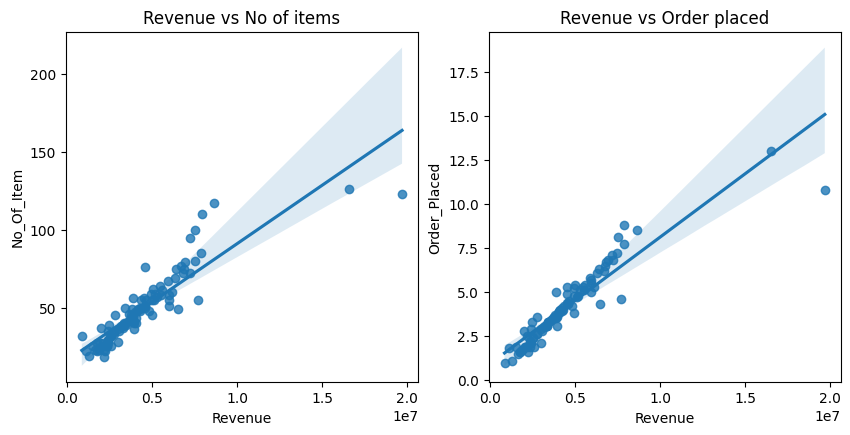

In [ ]:
#verifying if we can perform linearregression on the values

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.regplot(y=df.No_Of_Item,x=df['Revenue'])
plt.title('Revenue vs No of items')

plt.subplot(2,2,2)
sns.regplot(y=df.Order_Placed,x=df['Revenue'])
plt.title('Revenue vs Order placed')

plt.show()

AS WE CAN SEE FROM THIS GRAPHS THAT WE CAN PERFORM LINEARREGRESSION WITH THE NO OF ITEM AND ORDERS PLACED COLUMNS FOR A MULTIPLE LINEARREGRESSION WITH THE REVENUE COLUMN


In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
x=df[['Order_Placed','No_Of_Item']]
y=df['Revenue']

splitting the data for the training of the model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Performing Multiple LinearRegression with two columns orderplaced,noofitems in x and revenue in y

In [ ]:
f=LinearRegression()

In [ ]:
f.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=f.predict(x_test)

Performing logistic regression on the same training and testing dataset

In [ ]:
g=LogisticRegression()

In [ ]:
g.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred2=g.predict(x_test)

performing randomforestRegressor in the training and testing sets

In [ ]:
h=RandomForestRegressor(n_estimators=1000)

In [ ]:
h.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred3=h.predict(x_test)

viewing the accuracies of all the three models,

In [ ]:
print("ACCURACY OF LINEARREGRRESSION:",r2_score(y_pred,y_test)*100,"%")
print("ACCURACY OF LOGISTICREGRRESSION:",r2_score(y_pred2,y_test)*100,"%")
print("ACCURACY OF RANDOMFORESTREGRESSOR:",r2_score(y_pred3,y_test)*100,"%")

ACCURACY OF LINEARREGRRESSION: 93.99964898939089 %
ACCURACY OF LOGISTICREGRRESSION: 69.50865051605852 %
ACCURACY OF RANDOMFORESTREGRESSOR: 91.30349587307894 %


This shows that out of the three regression models LinearRegression performs well with the training and testing data and gives better accuracy